#1. Analyzing and preprocessing the movie review data

1- We import all necessary modules from TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences

2- Keras has a built-in IMDb dataset, so first, we load the dataset

In [2]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


3- Take a look at the training and testing data we just loaded

In [3]:
print('Number of training samples: ', len(y_train))
print('Number of positive samples:', sum(y_train))
print('Number of test samples:', len(y_test))

Number of training samples:  25000
Number of positive samples: 12500
Number of test samples: 25000


4- Print a training sample, as follows

In [4]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


5- We use the word dictionary to map the integer back to the word it represents:

In [5]:
word_index = imdb.get_word_index()
index_word = {index: word for word, index in word_index.items()}
print([index_word.get(i, ' ') for i in X_train[0]])

1641221/1641221 [==============================] - 0s 0us/step
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', '

6- Next, we analyze the length of each sample (the number of words in each review, for example). We do so
because all the input sequences to an RNN model must be the same lengt

In [6]:
review_lengths = [len(x) for x in X_train]

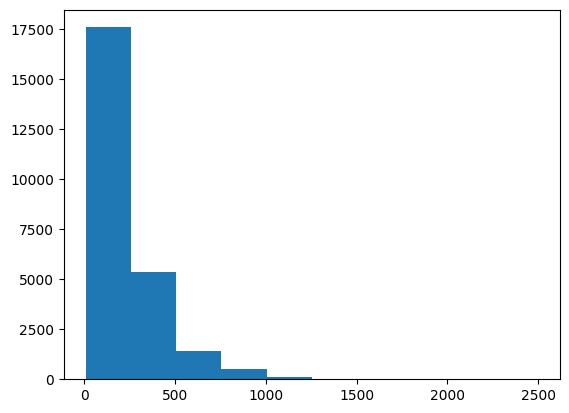

In [7]:
import matplotlib.pyplot as plt
plt.hist(review_lengths, bins=10)
plt.show()

7- As you can see, the majority of the reviews are around 200 words long. Next, we set 200 as the universal
sequence length by padding shorter reviews with zeros and truncating longer reviews. We use
the pad_sequences function from Keras to accomplish this

In [8]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

Let's look at the shape of the input sequences after this:

In [9]:
print('X_train shape after padding:', X_train.shape)

X_train shape after padding: (25000, 200)


In [10]:
print('X_test shape after padding:', X_test.shape)

X_test shape after padding: (25000, 200)


# 2. Developing a simple LSTM network

1 - First, we fix the random seed and initiate a Keras Sequential model:


In [11]:
tf.random.set_seed(42)
model = models.Sequential()

2. Since our input sequences are word indices that are equivalent to one-hot encoded vectors, we need to
embed them in dense vectors using the Embedding layer from Keras:

In [12]:
embedding_size = 32
model.add(layers.Embedding(vocab_size, embedding_size))

3. Now here comes the recurrent layer, the LSTM layer specifically

In [13]:
model.add(layers.LSTM(50))

4. After that, we add the output layer, along with a sigmoid activation function, since we are working on a binary
classification problem

In [14]:
model.add(layers.Dense(1, activation='sigmoid'))

5 . Display the model summary to double-check the layers:

In [15]:
 print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
_________________________________________________________________
None


6. Next, we compile the model with the Adam optimizer and use binary cross-entropy as the optimization target:


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

7 - Finally, we train the model with batches of size 64 for three epochs:

In [17]:
batch_size = 64
n_epoch = 3
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(X_test, y_test))

Epoch 1/3
391/391 [==============================] - 80s 198ms/step - loss: 0.4669 - accuracy: 0.7660 - val_loss: 0.3320 - val_accuracy: 0.8604
Epoch 2/3
391/391 [==============================] - 82s 210ms/step - loss: 0.2730 - accuracy: 0.8916 - val_loss: 0.3051 - val_accuracy: 0.8714
Epoch 3/3
391/391 [==============================] - 80s 206ms/step - loss: 0.2349 - accuracy: 0.9090 - val_loss: 0.3113 - val_accuracy: 0.8707


8. Using the trained model, we evaluate the classification accuracy on the testing set:


In [18]:
acc = model.evaluate(X_test, y_test, verbose = 0)[1]
print('Test accuracy:', acc)

Test accuracy: 0.8706799745559692


# 3. Boosting the performance with multiple LSTM layers

1- Initiate a new model and add an embedding layer, two LSTM layers, and an output layer

In [19]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_size))
model.add(layers.LSTM(50, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(50, dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          16600     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 196,851
Trainable params: 196,851
Non-trainable params: 0
_________________________________________________________________
None


2- Similarly, we compile the model with the Adam optimizer at a 0.003 learning rate:

In [21]:
optimizer = optimizers.Adam(learning_rate=0.003)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

3- Then, we train the stacked model for 7 epochs:

In [22]:
n_epoch = 7
model.fit(X_train, y_train,
batch_size=batch_size,
epochs=n_epoch,
validation_data=(X_test, y_test))

Epoch 1/7
391/391 [==============================] - 165s 407ms/step - loss: 0.4554 - accuracy: 0.7898 - val_loss: 0.4327 - val_accuracy: 0.8144
Epoch 2/7
391/391 [==============================] - 170s 435ms/step - loss: 0.3513 - accuracy: 0.8506 - val_loss: 0.3867 - val_accuracy: 0.8354
Epoch 3/7
391/391 [==============================] - 166s 424ms/step - loss: 0.2879 - accuracy: 0.8813 - val_loss: 0.3133 - val_accuracy: 0.8652
Epoch 4/7
391/391 [==============================] - 165s 423ms/step - loss: 0.2493 - accuracy: 0.9008 - val_loss: 0.3214 - val_accuracy: 0.8618
Epoch 5/7
391/391 [==============================] - 163s 417ms/step - loss: 0.2070 - accuracy: 0.9191 - val_loss: 0.3149 - val_accuracy: 0.8718
Epoch 6/7
391/391 [==============================] - 167s 427ms/step - loss: 0.1872 - accuracy: 0.9273 - val_loss: 0.3244 - val_accuracy: 0.8746
Epoch 7/7
391/391 [==============================] - 168s 429ms/step - loss: 0.1593 - accuracy: 0.9387 - val_loss: 0.3199 - val_ac

4- Then, we verify the test accuracy

In [23]:
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy with stacked LSTM:', acc)

Test accuracy with stacked LSTM: 0.8749200105667114


# RNNs-movie_review_sentiment


In [24]:
import numpy as np
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


5- Finally, we plot the learning curves

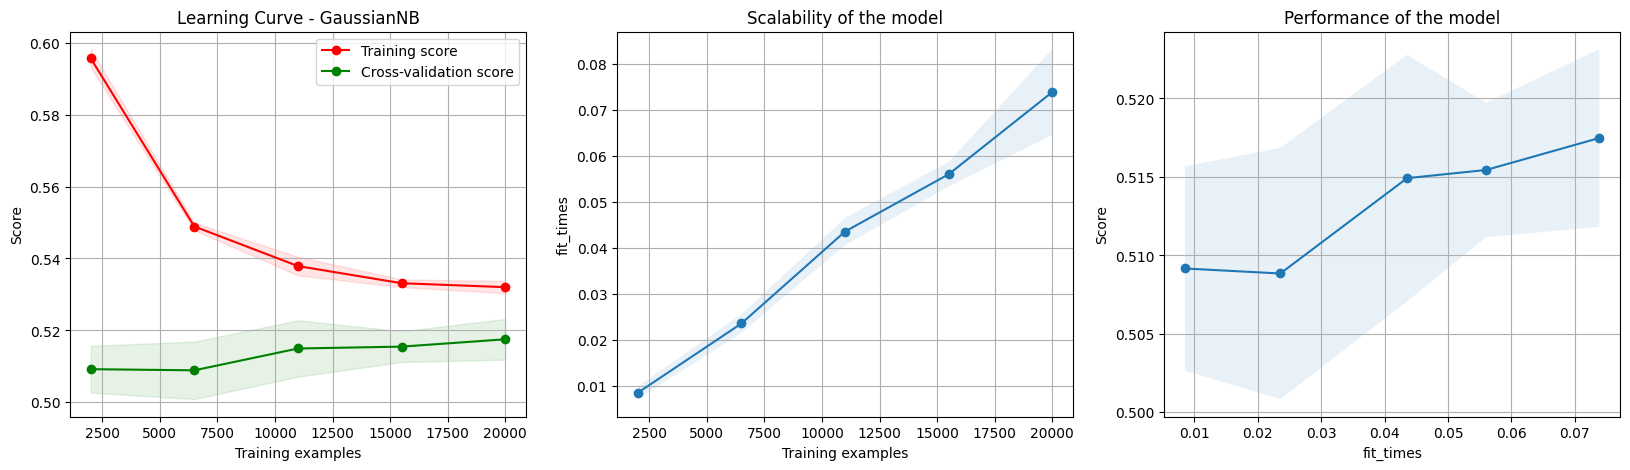

In [25]:
from sklearn.naive_bayes import GaussianNB
estimator = GaussianNB(var_smoothing=1e-09)
# call plot_learning_curve
x = plot_learning_curve(estimator, "Learning Curve - GaussianNB", X_train, y_train)
x.show()